## MNIST hand-written digit classified with a fully-connected network

In this example, we will build a fully connected neural network for classification of the MNIST hand-written data set.
Valuable resources that I borrowed from to create this notebook are below.

https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html

https://medium.com/@aungkyawmyint_26195/multi-layer-perceptron-mnist-pytorch-463f795b897a

https://nextjournal.com/gkoehler/pytorch-mnist

In [40]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
%matplotlib inline

In [41]:
torch.backends.cudnn.enabled = False #Use a GPU?
random_seed = 1
torch.manual_seed(random_seed) #Initialize a random number generator

In [42]:
#download training dataset
batch_size_train = 32
batch_size_test = 1000

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../../data', train=True, download=False,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

#download testing dataset
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../../data', train=False, download=False,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [43]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)

torch.Size([32, 1, 28, 28])


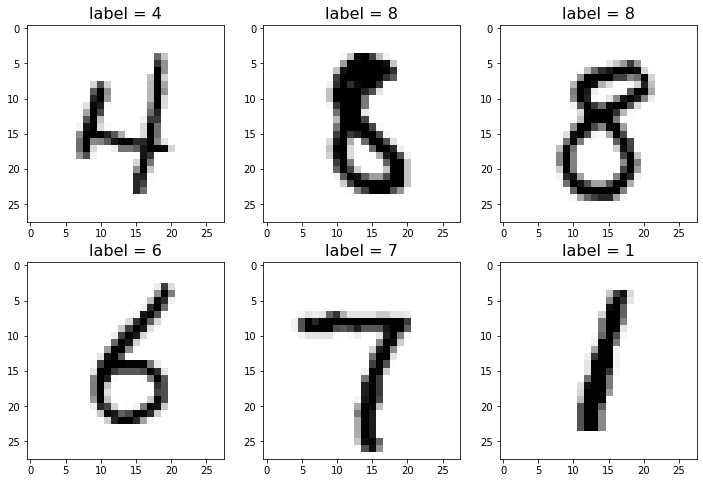

In [44]:
def imshow(example_data,example_targets):
    '''
    example_data: a batch of images
    example_tagets: the labels beloning to example_data
    '''
    fig,axes = plt.subplots(figsize=[12,8],ncols=3,nrows=2)
    axes[0,0].imshow(example_data[0,0,:,:],cmap='gray_r')
    axes[0,1].imshow(example_data[1,0,:,:],cmap='gray_r')
    axes[0,2].imshow(example_data[2,0,:,:],cmap='gray_r')
    axes[1,0].imshow(example_data[3,0,:,:],cmap='gray_r')
    axes[1,1].imshow(example_data[4,0,:,:],cmap='gray_r')
    axes[1,2].imshow(example_data[5,0,:,:],cmap='gray_r')
    axes[0,0].set_title('label = {}'.format(example_targets[0].detach().numpy()),fontsize=16)
    axes[0,1].set_title('label = {}'.format(example_targets[1].detach().numpy()),fontsize=16)
    axes[0,2].set_title('label = {}'.format(example_targets[2].detach().numpy()),fontsize=16)
    axes[1,0].set_title('label = {}'.format(example_targets[3].detach().numpy()),fontsize=16)
    axes[1,1].set_title('label = {}'.format(example_targets[4].detach().numpy()),fontsize=16)
    axes[1,2].set_title('label = {}'.format(example_targets[5].detach().numpy()),fontsize=16)

imshow(example_data,example_targets)

### Building the network (using a multi-layer perceptron)

In [45]:
class Simple_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        nhidden1 = 16
        nhidden2 = 16
        self.fc1 = nn.Linear(28*28, nhidden1)
        self.fc2 = nn.Linear(nhidden1, nhidden2)
        self.fc3 = nn.Linear(nhidden2,10)

    def forward(self, x):
        
        x = x.view(-1,28*28) #flatten image to vector
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [46]:
network = Simple_MLP()
optimizer = optim.SGD(network.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
print(network)

Simple_MLP(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=10, bias=True)
)


### Train the network

In [47]:
n_epochs = 3

for epoch in range(0,n_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #print(inputs,labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = network(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (i+1) % 100 == 0:    # print loss every 1000 mini-batches
            print('epoch: {}, batch: {}, loss: {}'.format(epoch+1,i+1,running_loss/100))
            running_loss = 0.0

print('Finished Training')

epoch: 1, batch: 100, loss: 2.23189936876297
epoch: 1, batch: 200, loss: 1.9369464135169983
epoch: 1, batch: 300, loss: 1.5472091293334962
epoch: 1, batch: 400, loss: 1.216335933804512
epoch: 1, batch: 500, loss: 0.8729979190230369
epoch: 1, batch: 600, loss: 0.6710231789946556
epoch: 1, batch: 700, loss: 0.5652290703356266
epoch: 1, batch: 800, loss: 0.52213329911232
epoch: 1, batch: 900, loss: 0.47039676442742345
epoch: 1, batch: 1000, loss: 0.4500766611844301
epoch: 1, batch: 1100, loss: 0.38148717895150186
epoch: 1, batch: 1200, loss: 0.39932177543640135
epoch: 1, batch: 1300, loss: 0.37030974082648754
epoch: 1, batch: 1400, loss: 0.36187476575374605
epoch: 1, batch: 1500, loss: 0.32858690835535526
epoch: 1, batch: 1600, loss: 0.3348158186674118
epoch: 1, batch: 1700, loss: 0.3269122199714184
epoch: 1, batch: 1800, loss: 0.3314108288288116
epoch: 2, batch: 100, loss: 0.3247345656901598
epoch: 2, batch: 200, loss: 0.3323187059164047
epoch: 2, batch: 300, loss: 0.29846105717122556
ep

### Test the network

In [48]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network 
        outputs = network(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 93 %


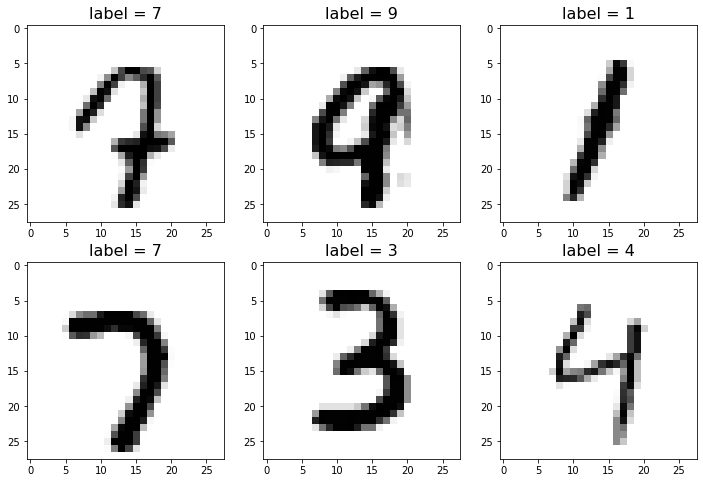

In [54]:
i_start = 0
i_end = i_start + 6
imshow(images[i_start:i_end],predicted[i_start:i_end])